In [1]:
import numpy as np
import scipy.signal as signal
%matplotlib notebook
import matplotlib.pyplot as plt

In [2]:
R_1 = 1000
R_2 = 510000
C = 0.1e-6

In [3]:
def diode (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s * (np.exp (x / v_t) - 1)

def diode_dot (x):
    v_t = 25.9 / 1000
    I_s = 0.2
    return I_s / v_t * (np.exp (x / v_t))

In [4]:
def deriv (x, x_1, x_1_dot, T):
    return (x - x_1) * (2/T) - x_1_dot

def integral (x_1, x_dot, x_1_dot, T):
    return x_1 + (T/2) * (x_dot + x_1_dot)

<IPython.core.display.Javascript object>


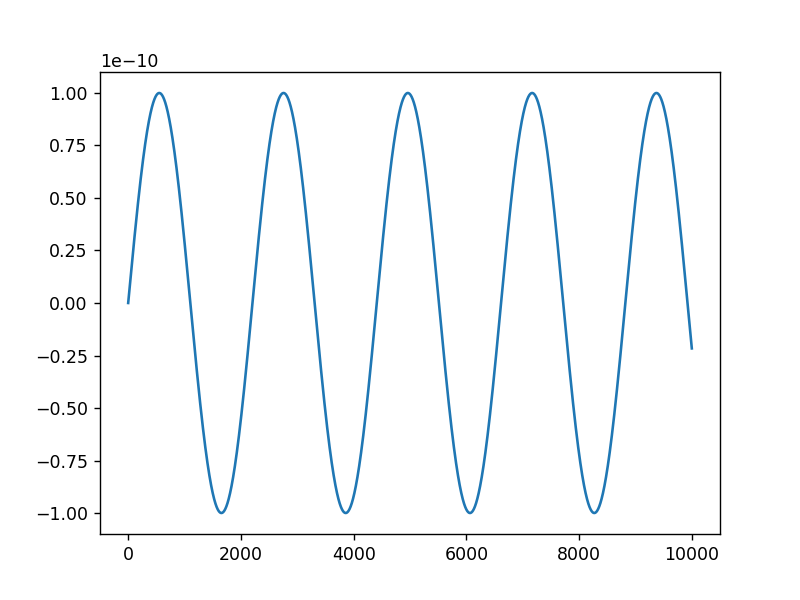

In [12]:
fs = 44100
N = 10000
freq = 20
n = np.arange (N)
x = np.sin (2 * np.pi * n * freq / fs) * 1e-10
plt.figure()
plt.plot (x)

<IPython.core.display.Javascript object>


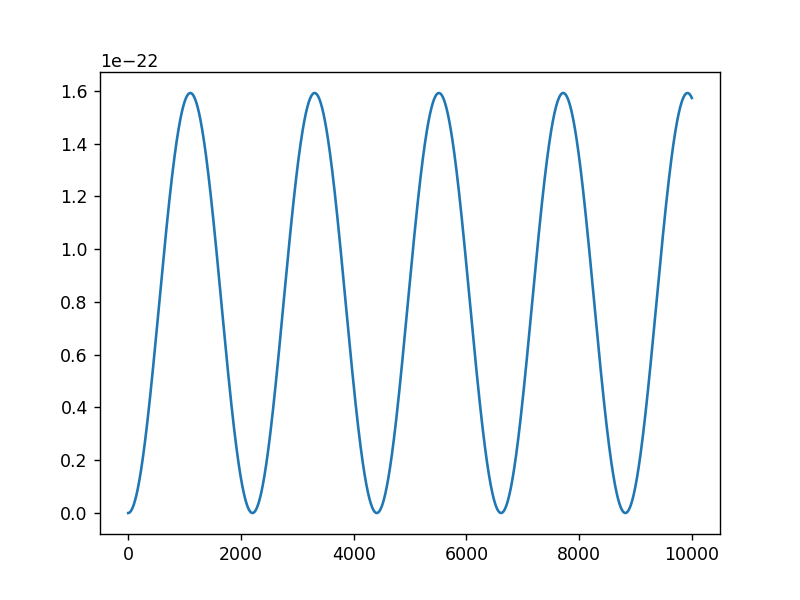

In [13]:
v_d = 0
v_d_dot = 0

v_o = 0
v_o_dot = 0

y = np.zeros (N)

for n in range (N):
    v_d_dot_1 = v_d_dot
    v_d_dot = (R_1 * v_o_dot * diode_dot (v_o - v_d)) / (1.0 + R_1 * diode_dot (v_o - v_d))
    v_d_1 = v_d
    v_d = integral (v_d_1, v_d_dot, v_d_dot_1, 1.0/fs)
    
    v_o_dot_1 = v_o_dot
    v_o_dot = C * ((x[n] - v_d) / R_1 - (v_o / R_2))
    v_o_1 = v_o
    v_o = integral (v_o_1, v_o_dot, v_o_dot_1, 1.0/fs)
    
    y[n] = v_o
    
plt.figure()
plt.plot (y)